In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SK', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

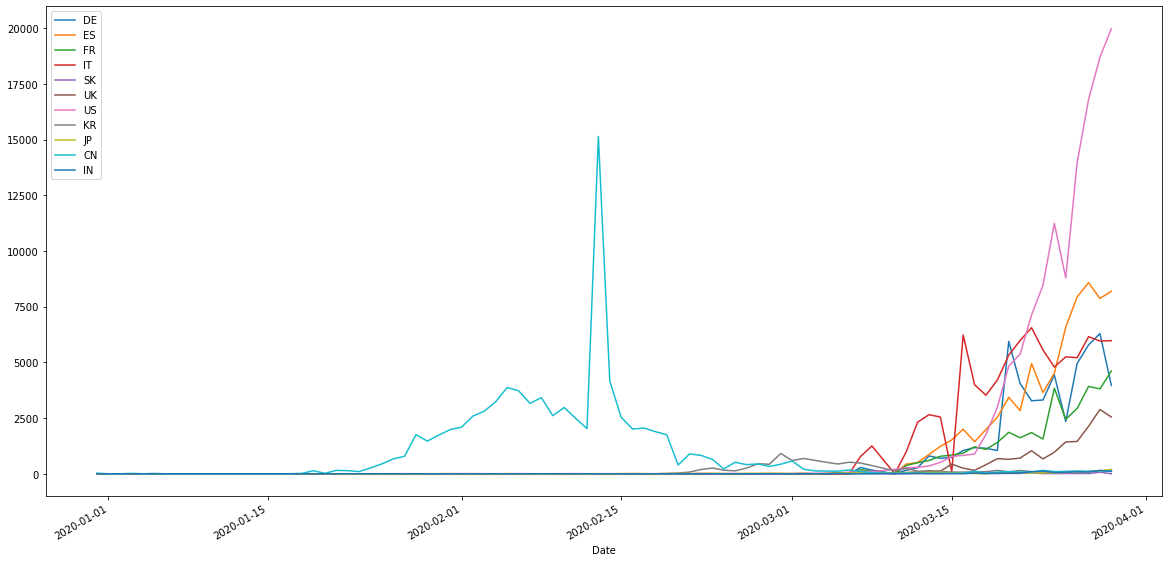

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 10))

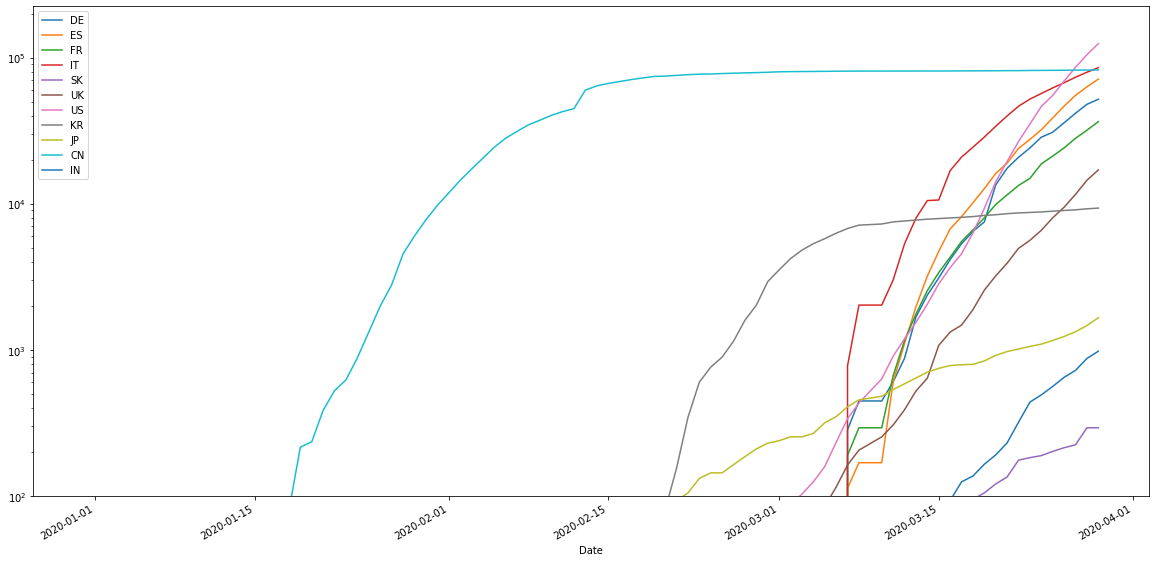

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 10), ylim=(100, None))

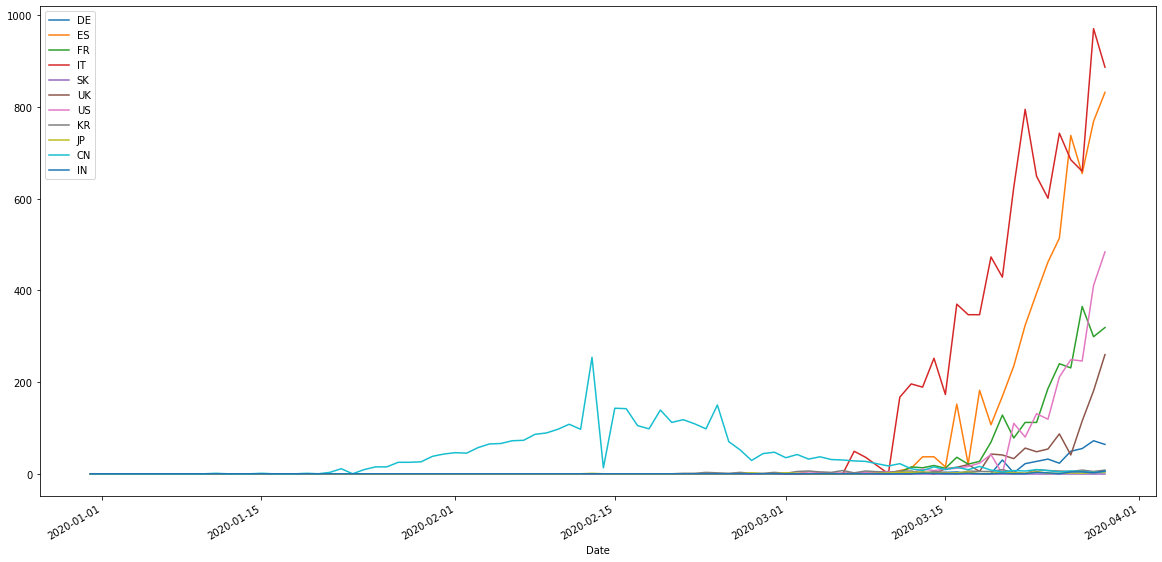

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 10))

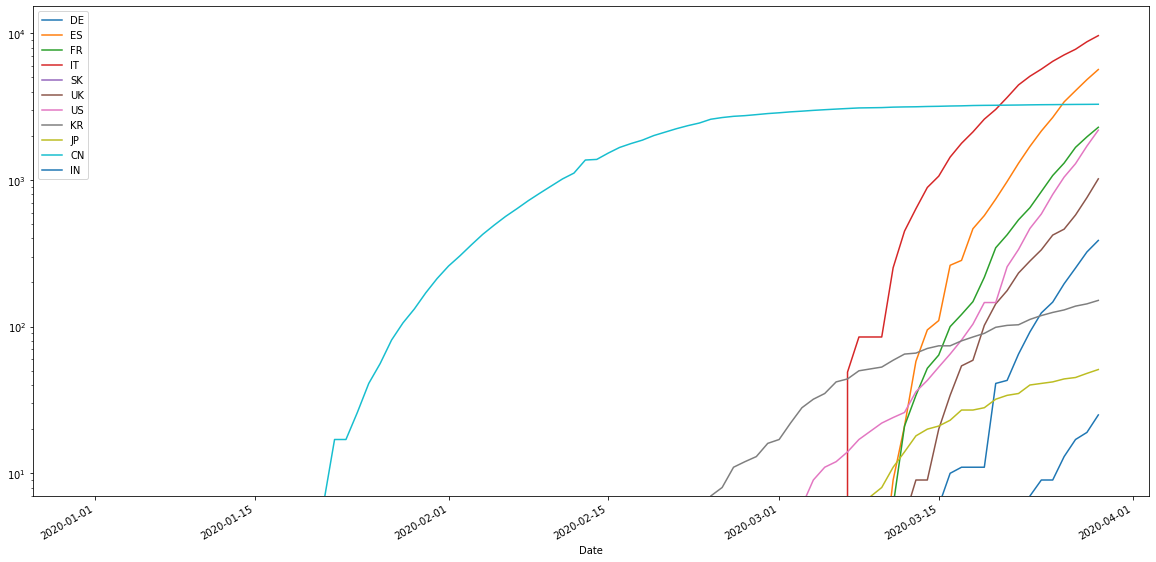

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 10), ylim=(7, None))

In [7]:
cases

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
88,2019-12-31,0.0,0.0,0.0,0.0,0.0,0,0,0,0,27,0
87,2020-01-01,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
86,2020-01-02,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
85,2020-01-03,0.0,0.0,0.0,0.0,0.0,0,0,0,0,17,0
84,2020-01-04,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-25,2342.0,6584.0,2446.0,5249.0,13.0,1427,8789,100,65,99,70
3,2020-03-26,4954.0,7937.0,2931.0,5210.0,12.0,1452,13963,104,75,121,87
2,2020-03-27,5780.0,8578.0,3922.0,6153.0,10.0,2129,16797,91,96,111,75
1,2020-03-28,6294.0,7871.0,3809.0,5959.0,69.0,2885,18695,146,135,134,149


In [8]:
sumCases

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,30862.0,38638.0,21183.0,62029.0,202.0,8010.0,55110.0,8889.0,1160.0,81802.0,562.0
2020-03-26,35816.0,46575.0,24114.0,67239.0,214.0,9462.0,69073.0,8993.0,1235.0,81923.0,649.0
2020-03-27,41596.0,55153.0,28036.0,73392.0,224.0,11591.0,85870.0,9084.0,1331.0,82034.0,724.0


In [9]:
deaths

,Date,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
88,2019-12-31,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
87,2020-01-01,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
86,2020-01-02,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
85,2020-01-03,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
84,2020-01-04,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-25,23.0,514.0,240.0,743.0,0.0,87,211,6,1,4,0
3,2020-03-26,49.0,738.0,231.0,685.0,0.0,41,249,5,2,6,4
2,2020-03-27,55.0,655.0,365.0,660.0,0.0,115,246,8,1,5,4
1,2020-03-28,72.0,769.0,299.0,971.0,0.0,181,411,5,3,3,2


In [10]:
sumDeaths

,DE,ES,FR,IT,SK,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,147.0,2670.0,1073.0,6441.0,0.0,421.0,797.0,125.0,42.0,3264.0,9.0
2020-03-26,196.0,3408.0,1304.0,7126.0,0.0,462.0,1046.0,130.0,44.0,3270.0,13.0
2020-03-27,251.0,4063.0,1669.0,7786.0,0.0,577.0,1292.0,138.0,45.0,3275.0,17.0
